# Allan deviation of ROMY components

### Import libraries

In [1]:
import sys, os
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import allantools as al

from matplotlib.pylab import *
from matplotlib import rc, font_manager
from obspy import *

In [2]:
if os.uname().nodename == 'lighthouse':
    root_path = '/home/andbro/'
    data_path = '/home/andbro/kilauea-data/'
    archive_path = '/home/andbro/freenas/'
elif os.uname().nodename == 'kilauea':
    root_path = '/home/brotzer/'
    data_path = '/import/kilauea-data/'
    archive_path = '/import/freenas-ffb-01-data/'

## Configuration

In [56]:
config = {}

config['tbeg'] = UTCDateTime("2023-06-04 00:00")
config['tend'] = UTCDateTime("2023-06-04 12:00")

### Import data

In [57]:
from andbro__load_romy_raw import __load_romy_raw

In [58]:
fjz = __load_romy_raw("BW.DROMY..FJZ", config['tbeg'], config['tend'])

In [59]:
# path = 'Desktop/GJI/Figure08/data/'

# stROMY = read(f"{path}data/romyADEV_BJ.mseed")
# stROMYZ = read(f"{path}data/romyADEV_BJZ.mseed")

Resample to 1 Hz and define tau axis

In [60]:

# stROMYZ.resample(1.0)
# stROMY.resample(1.0)


tau1 = 1e-3
tau2 = 1e2
taus = np.logspace(tau1, tau2, 1000)
taus

array([  1.00230524e+000,   1.26211550e+000,   1.58927188e+000,
         2.00123135e+000,   2.51997595e+000,   3.17318575e+000,
         3.99571583e+000,   5.03145617e+000,   6.33567356e+000,
         7.97796069e+000,   1.00459495e+001,   1.26499873e+001,
         1.59290248e+001,   2.00580305e+001,   2.52573270e+001,
         3.18043472e+001,   4.00484383e+001,   5.04295026e+001,
         6.35014707e+001,   7.99618591e+001,   1.00688989e+002,
         1.26788855e+002,   1.59654138e+002,   2.01038520e+002,
         2.53150260e+002,   3.18770026e+002,   4.01399268e+002,
         5.05447061e+002,   6.36465364e+002,   8.01445277e+002,
         1.00919008e+003,   1.27078498e+003,   1.60018860e+003,
         2.01497782e+003,   2.53728569e+003,   3.19498239e+003,
         4.02316244e+003,   5.06601728e+003,   6.37919335e+003,
         8.03276136e+003,   1.01149552e+004,   1.27368802e+004,
         1.60384414e+004,   2.01958093e+004,   2.54308198e+004,
         3.20228115e+004,   4.03235313e+

### Calculation of Allan deviation

In [61]:
(tZ, adZ, ade, adn) = al.adev(fjz[0].data, 
                              rate=fjz[0].stats.sampling_rate, 
                              data_type="freq", 
                              taus=taus
                             )
# (tU, adU, ade, adn) = al.adev(stROMY.select(channel='BJU')[0].data, 
#                               rate=stROMY[0].stats.sampling_rate, 
#                               data_type="freq", 
#                               taus=taus
#                              )
# (tV, adV, ade, adn) = al.adev(stROMY.select(channel='BJV')[0].data, 
#                               rate=stROMY[0].stats.sampling_rate, 
#                               data_type="freq", 
#                               taus=taus
#                              )
# (tW, adW, ade, adn) = al.adev(stROMY.select(channel='BJW')[0].data, 
#                               rate=stROMY[0].stats.sampling_rate, 
#                               data_type="freq", 
#                               taus=taus
#                              )

### Plotting

In [62]:
sizeOfFont = 16

fontProperties = {'weight' : 'bold', 'size' : sizeOfFont}

rc('font',**fontProperties)

## colors
c_a = (0,0,1)
c_z = (0,0,0)
c_v = (0,0,0)
c_w = (0,0,0)
c_u = (0,0,0)

(1, 2000.0)

Text(0.5, 0, '$\\tau$ [s]')

Text(0, 0.5, '$\\sigma(\\tau)$ [rad/s]')

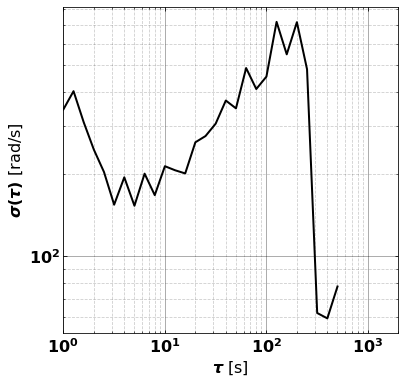

In [65]:

fig = plt.figure(figsize=(6, 6))
ax00 = plt.subplot2grid((1, 1), (0, 0))

line_z, = ax00.loglog(tZ, adZ, color=c_z, linewidth=2, linestyle='-')
# line_v, = ax00.loglog(tV, adV, color=c_v, linewidth=2, linestyle='--')
# line_w, = ax00.loglog(tW, adW, color=c_w, linewidth=2, linestyle=':')
# line_u, = ax00.loglog(tU, adU, color=c_u, linewidth=2, linestyle='-.')

# ax00.set_ylim(1e-12, 1.5e-10)    
ax00.set_xlim(1, 2e3)

ax00.grid(which='major', color='k', alpha=0.4, linestyle='-')
ax00.grid(which='minor', color='k', alpha=0.2, linestyle='--')

ax00.tick_params(axis='x', which='major', direction='in', top=True)
ax00.tick_params(axis='x', which='minor', direction='in', top=True)
ax00.tick_params(axis='y', which='major', direction='in', right=True)
ax00.tick_params(axis='y', which='minor', direction='in', right=True)

ax00.set_xlabel(r'$\tau$ [s]')
ax00.set_ylabel(r'$\sigma(\tau)$ [rad/s]')

# legend
# lines = [line_z, line_v, line_w, line_u]
# labels = ['Z',  'V', 'W', 'U']
    
# plt.legend(lines, labels,
#             loc=(0.1, 0.1),
#             bbox_transform=None,
#             frameon=True,
#             ncol = 1,
#           )



# plt.subplots_adjust(
#                     top=0.98,
#                     bottom=0.1,
#                     left=0.15,
#                     right=0.98,
#                     hspace=0.05,
#                     wspace=0.05,
# )

# plt.savefig(f'{path}adev_ROMY_single.png')

plt.show()


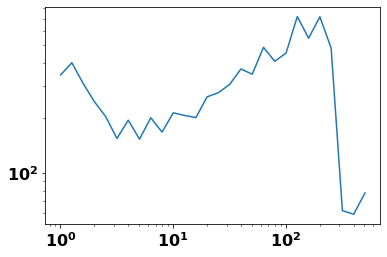

In [64]:
plt.loglog(tZ, adZ)